# MTCS 104(P): HCI1 Summative Test
<br>*Practicals: Digital Image Processing*
<br>*I MTech CS*
<br>*Regd no: 22555*
<br>*Date of submission: 19/11/2022*
<br>
<br>Task: 
<br>*Segment the given image img.jpg using any of the techniques discussed in the course.*
<br>*Evaluate the segmentation accuracy of your segmentation prediction with the ground truth given in gt.png using Dice and Jaccard metrics*
<br>*Provide the scores.*

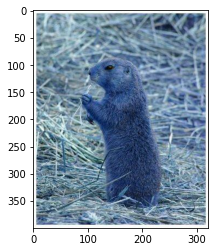

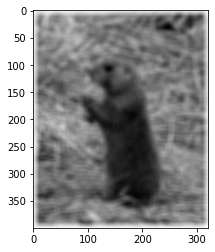

In [198]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Uploading the image to the notebook and change it to gray scale
image = cv2.imread('img.jpg')
plt.show(plt.imshow(image, cmap = 'gray'))
img_gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Bluring the gray image with the size of filter to be 11*11
img = cv2.blur(img_gray,(11,11))
plt.show(plt.imshow(img, cmap = 'gray'))

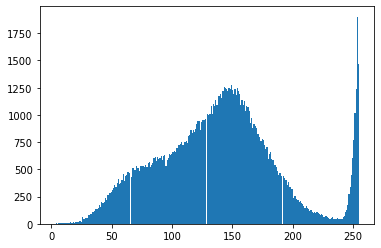

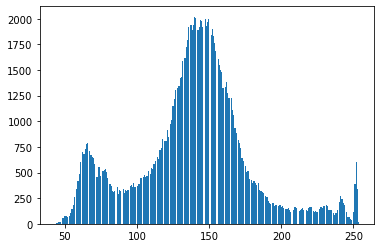

In [199]:
# Plotting the histograms of the input image and the blured image

plt.show(plt.hist(img_gray.flatten(),bins = 256))
plt.show(plt.hist(img.flatten(),bins = 256))

In [200]:
# Finding the global Threshold 

h,w = np.shape(img)
T0 = 100    # Predicted Threshold
T = T0      # Global Threshold
delta_T = 255

g1 = []     # list that stores all the intensies less than equal to T
g2 = []     # list that stores all the intensies greater than T

while(delta_T > 1):
    for i in range(0,h):
        for j in range(0,w):
            if (img[i][j] <= T):
                g1.append(img[i][j])
            else:
                g2.append(img[i][j])
    
    # Takeing mean of the intensies in the left and right
    m1 = sum(g1) / len(g1)
    m2 = sum(g2) / len(g2)
    
    T0 = T
    T = (m1+ m2)/2
    
    delta_T = abs(T-T0)

print('The Global Threshold: ',T)

The Global Threshold:  118.41964529323667


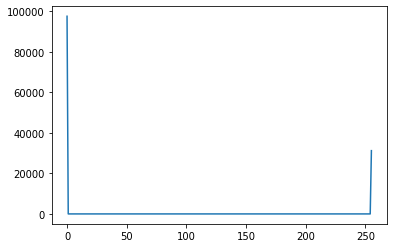

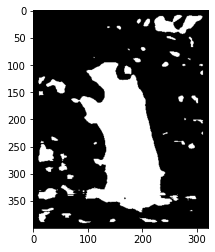

In [201]:
# Making the Binary image

for i in range(0,h):
    for j in range(0,w):
        if (img[i][j] < T):
            img[i][j] = 255
        else:
            img[i][j] = 0

# Plotting the histogram of the Binary image
plt.show(plt.plot(cv2.calcHist([img],[0],None,[256],[0,256])))

plt.show(plt.imshow(img, cmap='gray'))

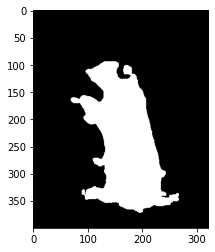

In [202]:
# Detecting all the connected edges
edges = cv2.dilate(cv2.Canny(img,0,255),None)

# Creating a dark mask 
mask = np.zeros(img.shape,dtype ='uint8')

# Finding all the Contours
contours = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

# Sorting all the Contours in the assending order of their areas
sorted_contours = sorted(contours, key = cv2.contourArea)

# Finding the Largest Contour
largest_contour = sorted_contours[-1]

# Drawing showing the contour on the mask
seg_img = cv2.drawContours(mask, [largest_contour], -1, 255 , -1)
plt.show(plt.imshow(seg_img,cmap = 'gray'))

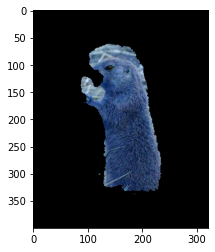

In [203]:
# Read the ground truth image and convert it to gray scale
gt = cv2.imread('gt.png')
gt_gray  = cv2.cvtColor(gt,cv2.COLOR_BGR2GRAY)

# Checking the alignment of the ground truth image with the originally given image
s = cv2.bitwise_or(image,image,mask=gt_gray)
plt.figure()
plt.imshow(s,cmap='gray')

In [204]:
# Found that the ground truth image is not aligned correctly with the original image.
# All the metrics to be calculated are with respective to the give ground truth image ('gt.png')

h,w = img.shape

# Function to calculate the Dice matric
def dice_metric(seg, orig):
    # True Positive, True Negative, False Positive and False Negative
    TP,TN, FP_FN = 0,0,0

    # To calculate TP and FP_FN
    for i in range(h):
        for j in range(w):
            if (seg[i][j] == orig[i][j]):
                if(seg[i][j] == 255):
                    TP += 1
                else:
                    TN += 1 
            else:
                FP_FN += 1  
    

    # Formula to calculate the dice metric
    dsc = (2*TP)/(2*TP + FP_FN)
    return dsc

d_m = dice_metric(seg_img,gt_gray)
print('Dice metric: ',d_m*100)

Dice metric:  73.61708666256914


In [205]:
# Formula to calculate the Jaccard metric

jaccard_metric = d_m/(2-d_m)
print('Jaccard metric: ', jaccard_metric*100)

Jaccard metric:  58.24924012158055


# References:
<br>https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
<br>https://betterprogramming.pub/image-segmentation-python-7a838a464a84